Let's run through some of these models again and see how they perform. 

In [3]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model selection
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import unicodedata
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer, WhitespaceTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob
import re

# Models
from sklearn.naive_bayes import MultinomialNB

# Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, make_scorer

# additional viz
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import PIL.ImageOps

#.py file
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
#import src.functions as asp

np.random.seed(42)
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
data = pd.read_csv('../Data/first_model_data.csv')
data

,Unnamed: 0,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,CHARTDATE,CHARTTIME,CATEGORY,DESCRIPTION,ISERROR,TEXT,DIAGNOSIS
0,0,46,144073,EMERGENCY,CLINIC REFERRAL/PREMATURE,2133-02-21,2133-02-21 05:07:00,Nursing/other,Report,NaN,MICU NPN 7P-7A\nPt. came from IR around 2200 p...,GASTROINTESTINAL BLEED
1,1,46,144073,EMERGENCY,CLINIC REFERRAL/PREMATURE,2133-02-24,NaN,Discharge summary,Report,NaN,Admission Date: [**2133-2-20**] Dischar...,GASTROINTESTINAL BLEED
2,2,112,174105,EMERGENCY,EMERGENCY ROOM ADMIT,2194-06-14,2194-06-14 04:55:00,Nursing/other,Report,NaN,NURSING MICU NOTE 7P-7A\n\nPT [**Name (NI) 577...,GASTROINTESTINAL BLEED
3,3,112,174105,EMERGENCY,EMERGENCY ROOM ADMIT,2194-06-18,NaN,Discharge summary,Report,NaN,Admission Date: [**2194-6-13**] Dischar...,GASTROINTESTINAL BLEED
4,4,158,169433,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2170-02-03,2170-02-03 13:29:00,Nursing/other,Report,NaN,NURSING ADMISSION NOTE 1200-1500\nPT IS A 67 Y...,GASTROINTESTINAL BLEED
...,...,...,...,...,...,...,...,...,...,...,...,...
11682,11682,98948,125469,EMERGENCY,CLINIC REFERRAL/PREMATURE,2136-10-29,NaN,Discharge summary,Report,NaN,Admission Date: [**2136-10-21**] ...,INTRACRANIAL HEMORRHAGE
11683,11683,99183,184631,EMERGENCY,CLINIC REFERRAL/PREMATURE,2157-03-04,NaN,Discharge summary,Report,NaN,Admission Date: [**2157-3-1**] D...,GASTROINTESTINAL BLEED
11684,11684,99184,171203,EMERGENCY,EMERGENCY ROOM ADMIT,2193-12-19,NaN,Discharge summary,Report,NaN,Admission Date: [**2193-12-16**] ...,INTRACRANIAL HEMORRHAGE
11685,11685,99366,136021,EMERGENCY,CLINIC REFERRAL/PREMATURE,2197-05-18,NaN,Discharge summary,Report,NaN,Admission Date: [**2197-3-20**] ...,INTRACRANIAL HEMORRHAGE


In [4]:
from nltk.corpus import stopwords
sw = stopwords.words('english')

def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def doc_preparer(doc, stop_words=sw):
    '''  
    :param doc: a document from the corpus 
    :return: a document string with words which have been 
            lemmatized, 
            parsed for stopwords, 
            made lowercase,
            and stripped of punctuation and numbers.
    '''
    
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in stop_words]
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return ' '.join(doc)

In [5]:
#Preprocess text data and train/test split 

X = data.TEXT.astype('str')
y = data.DIAGNOSIS.astype('str')

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.25)

token_docs = [doc_preparer(doc, sw) for doc in X_train]
token_docs[0]

'neuro pt remain pleasant good historian pr c arithitic pain receive tylenol mg desire effect reach within min pt remain afebrile time neuro deficit note cv pt begin hr shift drop sbp hr occ pac pt fill ileostomy time loose maroon stool pt give bolus cc n quickly respond return baseline regard v pt drop hct pt receive two unit prbc take red tag study intervention take place hct rechecked follow scan result two hr later pt drop sbp pt c burn sensation upper abd denies c p sob h r occ pac pt respond cc n bolus return baseline v hct send reconfirm result hct pt since receive three additional unit micu intern resident pt bedside observe pt output total cc frothy maroon brown liquid maroon red ace inhibitor presently hold g team notify resp pt remain clear lung sound field c sob resp rate remain regular continue monitor closely pt receive multiple bolus blood transfusion gu gi pt remain npo time abd remain soft non tender bowel sound easily audible ileostomy bag change without difficulty pt

In [7]:
# fit the model on the training set and see how that performs

cv = CountVectorizer(max_df=250,max_features=500)

X_train_vec = cv.fit_transform(X_train)
X_train_vec  = pd.DataFrame.sparse.from_spmatrix(X_train_vec)
X_train_vec.columns = sorted(cv.vocabulary_)
X_train_vec.set_index(y_train.index, inplace=True)
X_train_vec

,00am,00pm,03,07,09,104,105,106,108,10am,...,wall,want,warfarin,wave,weight,what,wheezing,withdrawal,words,zosyn
9143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11317,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5390,2,0,0,0,3,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)
prior_0 = y_train.value_counts()['GASTROINTESTINAL BLEED']/len(y_train)
prior_1 = y_train.value_counts()['INTRACRANIAL HEMORRHAGE']/len(y_train)

print(prior_0, prior_1)
print(np.log(prior_1))

0.5602966343411295 0.4397033656588705
-0.8216549483810232


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_hat = mnb.predict(X_train_vec)
print(accuracy_score(y_train, y_hat))
print(confusion_matrix(y_train,y_hat))

0.7625784369652026
[[4485  426]
 [1655 2199]]


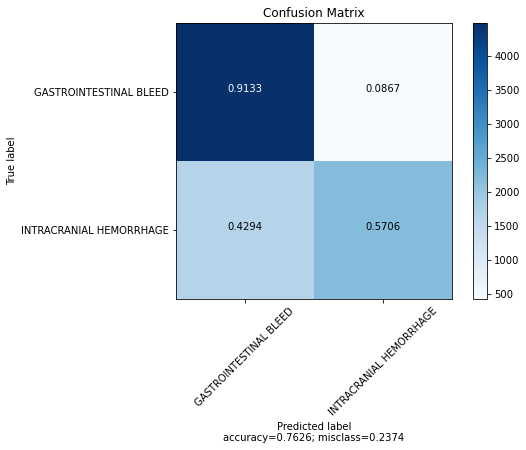

<Figure size 432x288 with 0 Axes>

In [12]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(cm = np.array(confusion_matrix(y_train,y_hat)), 
                      normalize    = True,
                      target_names = ['GASTROINTESTINAL BLEED','INTRACRANIAL HEMORRHAGE'],
                      title        = "Confusion Matrix")

plt.savefig('../Reports/images/ConfMat_FSM.png')

In [13]:
X_test_vec = cv.fit_transform(X_test)
X_test_vec  = pd.DataFrame.sparse.from_spmatrix(X_test_vec)
X_test_vec.columns = sorted(cv.vocabulary_)
X_test_vec.set_index(y_test.index, inplace=True)
X_test_vec

,00,000,01,02,03,04,05,06,07,08,...,within,work,would,x1,x2,x3,years,yesterday,you,your
7868,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3068,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
468,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11275,0,0,6,0,0,0,0,3,5,0,...,0,1,0,0,0,0,0,0,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3837,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
7201,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [14]:
mnb.fit(X_test_vec, y_test)
prior_0 = y_test.value_counts()['GASTROINTESTINAL BLEED']/len(y_test)
prior_1 = y_test.value_counts()['INTRACRANIAL HEMORRHAGE']/len(y_test)

print(prior_0, prior_1)
print(np.log(prior_1))

0.5574948665297741 0.44250513347022585
-0.8153032135387873


In [15]:
y_hat = mnb.predict(X_test_vec)
print(accuracy_score(y_test, y_hat))
print(confusion_matrix(y_test,y_hat))

0.8127994524298425
[[1411  218]
 [ 329  964]]


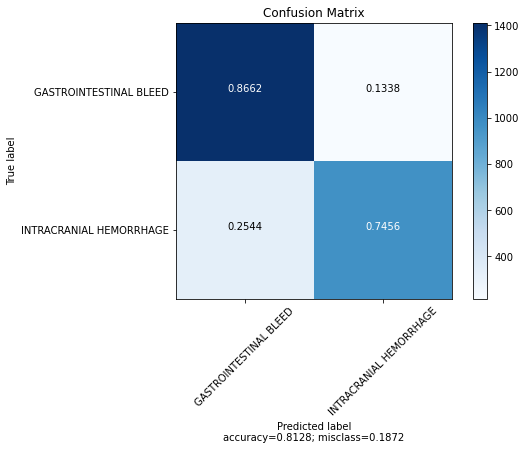

<Figure size 432x288 with 0 Axes>

In [17]:
plot_confusion_matrix(cm = np.array(confusion_matrix(y_test,y_hat)), 
                      normalize    = True,
                      target_names = ['GASTROINTESTINAL BLEED','INTRACRANIAL HEMORRHAGE'],
                      title        = "Confusion Matrix")

plt.savefig('../Reports/images/ConfMat_FSM_test.png')

In [18]:
#Let's see if a different vectorizer makes any difference

tfidf = TfidfVectorizer(max_df=250,max_features=500)

X_train_vec = tfidf.fit_transform(X_train)
X_train_vec  = pd.DataFrame.sparse.from_spmatrix(X_train_vec)
X_train_vec.columns = sorted(cv.vocabulary_)
X_train_vec.set_index(y_train.index, inplace=True)
X_train_vec

,00,000,01,02,03,04,05,06,07,08,...,within,work,would,x1,x2,x3,years,yesterday,you,your
9143,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
603,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3784,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7690,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11317,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.225927,0.0,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.000000,0.0,0.051246,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.06053,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.167891,0.0,0.000000,0.0,0.220945,0.0,0.0,0.0,0.000000,0.0,...,0.218353,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)
prior_0 = y_train.value_counts()['GASTROINTESTINAL BLEED']/len(y_train)
prior_1 = y_train.value_counts()['INTRACRANIAL HEMORRHAGE']/len(y_train)

print(prior_0, prior_1)
print(np.log(prior_1))

0.5602966343411295 0.4397033656588705
-0.8216549483810232


In [20]:
y_hat = mnb.predict(X_train_vec)
print(accuracy_score(y_train, y_hat))
print(confusion_matrix(y_train,y_hat))

0.7774101540216771
[[4503  408]
 [1543 2311]]


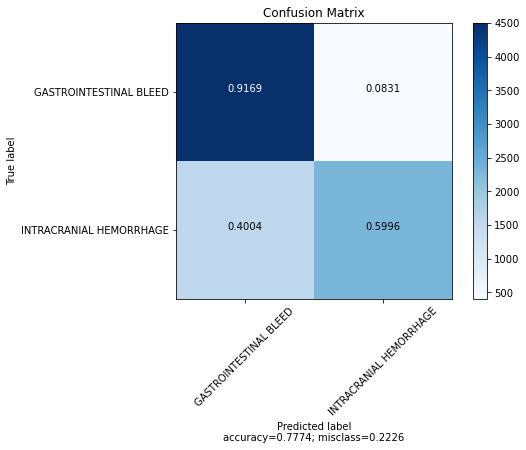

<Figure size 432x288 with 0 Axes>

In [21]:
plot_confusion_matrix(cm = np.array(confusion_matrix(y_train,y_hat)), 
                      normalize    = True,
                      target_names = ['GASTROINTESTINAL BLEED','INTRACRANIAL HEMORRHAGE'],
                      title        = "Confusion Matrix")

plt.savefig('../Reports/images/ConfMat_FSM_tfidf.png')

In [22]:
X_test_vec = tfidf.fit_transform(X_test)
X_test_vec  = pd.DataFrame.sparse.from_spmatrix(X_test_vec)
X_test_vec.columns = sorted(cv.vocabulary_)
X_test_vec.set_index(y_test.index, inplace=True)
X_test_vec

,00,000,01,02,03,04,05,06,07,08,...,within,work,would,x1,x2,x3,years,yesterday,you,your
7868,0.0,0.0,0.187817,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.166617,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
4526,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
3068,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.481314,0.00000,0.000000
468,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.185385,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
11275,0.0,0.0,0.187280,0.0,0.0,0.0,0.0,0.095111,0.164835,0.000000,...,0.000000,0.027690,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.35336,0.104093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
3837,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.112170,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
3753,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.149693,0.152083,0.0,0.000000,0.00000,0.000000
7201,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.194357,...,0.157248,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000


In [23]:
y_hat = mnb.predict(X_test_vec)
print(accuracy_score(y_test, y_hat))
print(confusion_matrix(y_test,y_hat))

0.4989733059548255
[[1018  611]
 [ 853  440]]


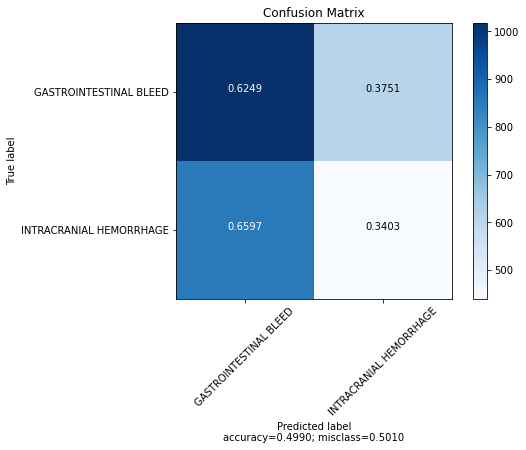

<Figure size 432x288 with 0 Axes>

In [24]:
plot_confusion_matrix(cm = np.array(confusion_matrix(y_test,y_hat)), 
                      normalize    = True,
                      target_names = ['GASTROINTESTINAL BLEED','INTRACRANIAL HEMORRHAGE'],
                      title        = "Confusion Matrix")

plt.savefig('../Reports/images/ConfMat_FSM_tfidf_test.png')

so, that wasn't helpful.  the Count Vectorizer is definitely out performing the tfidf vectorizer.

In [27]:
# Let's take another look at the data and see if there is anything to improve this.

print(data.CATEGORY.value_counts())
print(data.DIAGNOSIS.value_counts())

Nursing/other        10203
Discharge summary     1484
Name: CATEGORY, dtype: int64
GASTROINTESTINAL BLEED     6540
INTRACRANIAL HEMORRHAGE    5147
Name: DIAGNOSIS, dtype: int64


In [32]:
print(data.SUBJECT_ID.nunique())

1328


In [33]:
print(data.HADM_ID.nunique())

1355


In [35]:
notes = data[(data.HADM_ID == 169433)]
notes

,Unnamed: 0,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,CHARTDATE,CHARTTIME,CATEGORY,DESCRIPTION,ISERROR,TEXT,DIAGNOSIS
4,4,158,169433,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2170-02-03,2170-02-03 13:29:00,Nursing/other,Report,NaN,NURSING ADMISSION NOTE 1200-1500\nPT IS A 67 Y...,GASTROINTESTINAL BLEED
5,5,158,169433,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2170-02-03,2170-02-03 17:34:00,Nursing/other,Report,NaN,CCU NURSING PROGRESS NOTE 3P-7P\nS. DENIES PAI...,GASTROINTESTINAL BLEED
6,6,158,169433,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2170-02-04,2170-02-04 06:24:00,Nursing/other,Report,NaN,"CCU NPN 7pm - 7am\nS: "" I know I won't be abl...",GASTROINTESTINAL BLEED
7,7,158,169433,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2170-02-06,NaN,Discharge summary,Report,NaN,Admission Date: [**2170-2-3**] Discharg...,GASTROINTESTINAL BLEED


In [36]:
#as I suspected, we are seeing multiple nursing/other note categories on each admission.  Let's limit our data to only the Discharge Summary note category.  

ds_only = data[(data.CATEGORY == 'Discharge summary')]
ds_only

,Unnamed: 0,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,CHARTDATE,CHARTTIME,CATEGORY,DESCRIPTION,ISERROR,TEXT,DIAGNOSIS
1,1,46,144073,EMERGENCY,CLINIC REFERRAL/PREMATURE,2133-02-24,NaN,Discharge summary,Report,NaN,Admission Date: [**2133-2-20**] Dischar...,GASTROINTESTINAL BLEED
3,3,112,174105,EMERGENCY,EMERGENCY ROOM ADMIT,2194-06-18,NaN,Discharge summary,Report,NaN,Admission Date: [**2194-6-13**] Dischar...,GASTROINTESTINAL BLEED
7,7,158,169433,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2170-02-06,NaN,Discharge summary,Report,NaN,Admission Date: [**2170-2-3**] Discharg...,GASTROINTESTINAL BLEED
21,21,186,164405,EMERGENCY,EMERGENCY ROOM ADMIT,2176-10-01,NaN,Discharge summary,Report,NaN,Admission Date: [**2176-9-25**] ...,GASTROINTESTINAL BLEED
26,26,212,189635,EMERGENCY,EMERGENCY ROOM ADMIT,2189-11-10,NaN,Discharge summary,Report,NaN,Admission Date: [**2189-11-7**] ...,INTRACRANIAL HEMORRHAGE
...,...,...,...,...,...,...,...,...,...,...,...,...
11682,11682,98948,125469,EMERGENCY,CLINIC REFERRAL/PREMATURE,2136-10-29,NaN,Discharge summary,Report,NaN,Admission Date: [**2136-10-21**] ...,INTRACRANIAL HEMORRHAGE
11683,11683,99183,184631,EMERGENCY,CLINIC REFERRAL/PREMATURE,2157-03-04,NaN,Discharge summary,Report,NaN,Admission Date: [**2157-3-1**] D...,GASTROINTESTINAL BLEED
11684,11684,99184,171203,EMERGENCY,EMERGENCY ROOM ADMIT,2193-12-19,NaN,Discharge summary,Report,NaN,Admission Date: [**2193-12-16**] ...,INTRACRANIAL HEMORRHAGE
11685,11685,99366,136021,EMERGENCY,CLINIC REFERRAL/PREMATURE,2197-05-18,NaN,Discharge summary,Report,NaN,Admission Date: [**2197-3-20**] ...,INTRACRANIAL HEMORRHAGE


In [37]:
#Now, let's do the same models with only the discharge summary notes

#Preprocess text data and train/test split 

X = ds_only.TEXT.astype('str')
y = ds_only.DIAGNOSIS.astype('str')

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.25)

token_docs = [doc_preparer(doc, sw) for doc in X_train]
token_docs[0]

'admission date discharge date date birth sex f service neurosurgery allergies codeine attend first name lf chief complaint headache nausea vomit major surgical invasive procedure none history present illness f patient w alzheimer dementia p fall c h difficulty w vision n v today past medical history alzheimer dementia p fall month w leave humerus fx social history non contributory family history non contributory physical exam upon admission mental status awake asleep arousable cooperative exam orientation orient person partially place language speech fluent good comprehension dysarthria paraphasic error ii pupil equally round reactive light mm bilaterally visual field difficult examine likely partial right homonymous hemianopsia iii iv vi extraocular movement intact bilaterally without nystagmus v vii facial strength sensation intact symmetric xii tongue midline without fasciculation motor normal bulk tone bilaterally strength full power throughout pronator drift sensation intact ligh

In [38]:
# fit the model on the training set and see how that performs - because the count vectorizer yielded better results above, we will start with that 

cv = CountVectorizer(max_df=250,max_features=500)

X_train_vec = cv.fit_transform(X_train)
X_train_vec  = pd.DataFrame.sparse.from_spmatrix(X_train_vec)
X_train_vec.columns = sorted(cv.vocabulary_)
X_train_vec.set_index(y_train.index, inplace=True)
X_train_vec

,00,00am,00pm,03,04,06,07,08,09,10mg,...,volume,wall,ward,warfarin,wave,went,wife,woman,worsening,wound
11368,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11388,0,0,0,2,2,1,0,1,7,0,...,1,2,0,0,0,1,0,2,0,13
4732,0,7,0,0,0,5,0,0,4,1,...,0,0,0,0,0,0,0,0,0,0
5448,0,0,0,0,0,0,0,12,0,0,...,0,0,0,0,0,0,0,0,0,0
11166,0,0,0,10,0,0,0,4,1,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11333,0,0,0,0,4,0,1,0,0,0,...,0,2,3,0,1,0,0,0,0,0
11497,0,0,0,0,5,5,0,0,1,0,...,1,0,0,1,0,1,3,0,0,0
10838,0,0,0,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)
prior_0 = y_train.value_counts()['GASTROINTESTINAL BLEED']/len(y_train)
prior_1 = y_train.value_counts()['INTRACRANIAL HEMORRHAGE']/len(y_train)

print(prior_0, prior_1)
print(np.log(prior_1))

0.5283018867924528 0.4716981132075472
-0.7514160886839211


In [40]:
y_hat = mnb.predict(X_train_vec)
print(accuracy_score(y_train, y_hat))
print(confusion_matrix(y_train,y_hat))

0.9703504043126685
[[582   6]
 [ 27 498]]


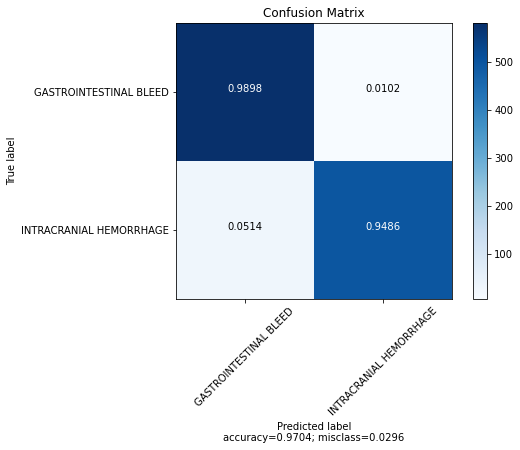

<Figure size 432x288 with 0 Axes>

In [41]:
plot_confusion_matrix(cm = np.array(confusion_matrix(y_train,y_hat)), 
                      normalize    = True,
                      target_names = ['GASTROINTESTINAL BLEED','INTRACRANIAL HEMORRHAGE'],
                      title        = "Confusion Matrix")

plt.savefig('../Reports/images/ConfMat_DS_CF_train.png')

In [42]:
#This is a pretty solid improvement onthe training data, let's see how it performs on the test 

X_test_vec = cv.fit_transform(X_test)
X_test_vec  = pd.DataFrame.sparse.from_spmatrix(X_test_vec)
X_test_vec.columns = sorted(cv.vocabulary_)
X_test_vec.set_index(y_test.index, inplace=True)
X_test_vec

,000,00am,01,02,03,04,05,06,07,08,...,white,wife,will,within,without,would,year,years,you,your
1911,0,0,0,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,2,5
5559,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11236,0,0,1,2,0,0,1,1,0,2,...,0,0,1,2,0,0,2,0,9,11
6876,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,1,0,2,7,5
11620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11435,0,2,2,0,8,1,1,3,3,0,...,1,0,1,3,5,1,3,2,4,5
5246,1,0,0,1,2,1,0,0,2,0,...,0,0,1,2,0,0,1,5,3,4
6373,0,0,0,0,0,0,0,0,2,0,...,0,0,2,0,1,0,0,0,0,0
10104,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,1,0,0,1,3,7


In [48]:
mnb = MultinomialNB()
mnb.fit(X_test_vec, y_test)
prior_0 = y_test.value_counts()['GASTROINTESTINAL BLEED']/len(y_test)
prior_1 = y_test.value_counts()['INTRACRANIAL HEMORRHAGE']/len(y_test)

print(prior_0, prior_1)
print(np.log(prior_1))

0.48787061994609165 0.5121293800539084
-0.6691779904469489


In [49]:
y_hat = mnb.predict(X_test_vec)
print(accuracy_score(y_test, y_hat))
print(confusion_matrix(y_test,y_hat))

0.9865229110512129
[[181   0]
 [  5 185]]


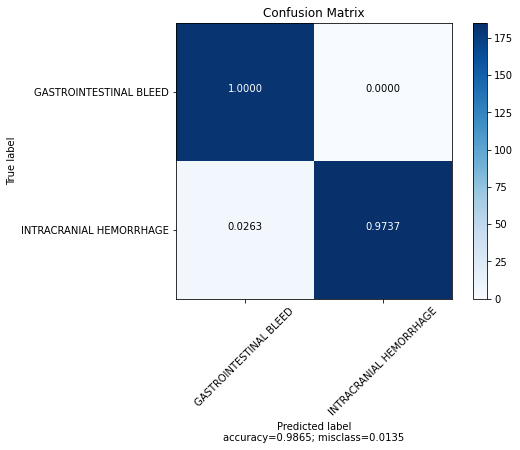

<Figure size 432x288 with 0 Axes>

In [50]:
plot_confusion_matrix(cm = np.array(confusion_matrix(y_test,y_hat)), 
                      normalize    = True,
                      target_names = ['GASTROINTESTINAL BLEED','INTRACRANIAL HEMORRHAGE'],
                      title        = "Confusion Matrix")

plt.savefig('../Reports/images/ConfMat_DS_CF_test.png')

#### this is still performing really well - not a single misclassified GI bleed!  as before, the test is performing slightly better than the train.  I believe we may have a situation where the model is honing in on something really specific.  Let's take a look.  Starting a new notebook since this one is getting really long

